## Problem Statement

HELP International, a humanitarian NGO is committed to fight poverty and provide people of backward countries basic amenities and relief.
It has been able to raise funds of $10 Million. We need to decide which countries are in direst need of aid
A dataset of 167 countries has been provided along with their socio economic and health factors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Hierarchial Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Steps
1. Data Quality Check
2. Univariate/ Bivariate Analysis
3. Outlier tretment
4. Scaling
5. Check the cluster Tendency(Hopkins Test)
6. Find best value of k using SSD, Silhouette Score
7. Using final value of k perform k means analysis
8. Visualise cluster using scatter plots
9. Perform cluster profiling
10. Hierarchical Clustering
11. Listing out the target countries

In [2]:
# Reading the data
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.shape

(167, 10)

In [5]:
# Calculating % null values
round(100*(df.isnull().sum()/len(df)))

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

#### Dataset has no missing values

In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Univariate Analysis

In [7]:
# convert export, import, heatlth % to absolute values
df['exports'] = df['exports'] * df['gdpp'] / 100
df['health'] = df['health'] * df['gdpp'] / 100
df['imports'] = df['imports'] * df['gdpp'] / 100

In [8]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


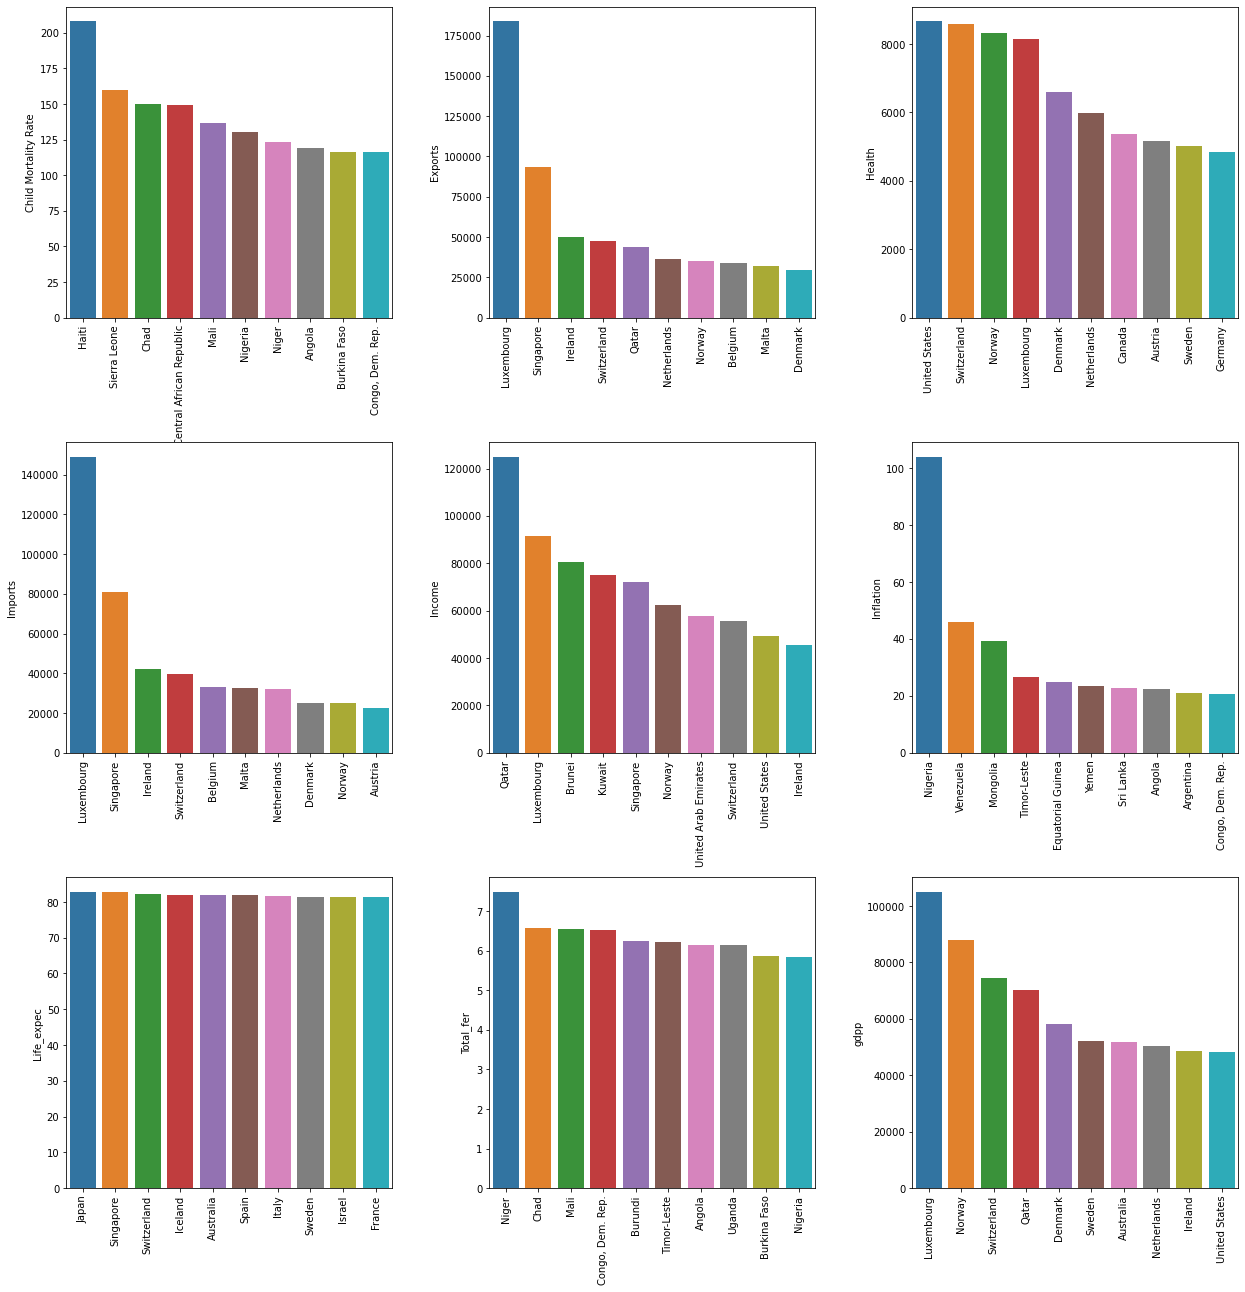

In [9]:
fig, axs = plt.subplots(3,3,figsize = (17,17))
fig.tight_layout()
plt.subplots_adjust( wspace = 0.3, hspace = 0.4)
top10_child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')


top10_exports = df[['country','exports']].sort_values('exports', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='exports', data= top10_exports, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Exports')

top10_health = df[['country','health']].sort_values('health', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='health', data= top10_health, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Health')

top10_imports = df[['country','imports']].sort_values('imports', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='imports', data= top10_imports, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Imports')

top10_income = df[['country','income']].sort_values('income', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='income', data= top10_income, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'Income')

top10_inflation = df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Inflation')

top10_life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= top10_life_expec, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Life_expec')

top10_total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Total_fer')

top10_gdpp = df[['country','gdpp']].sort_values('gdpp', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= top10_gdpp, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'gdpp')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)

In [10]:
col = list(df.columns)

In [11]:
col = col[1:]

In [12]:
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


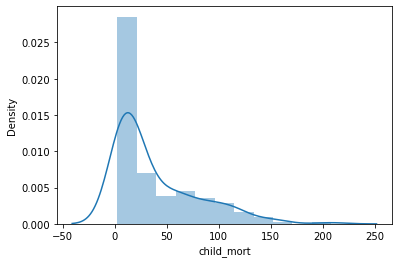

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


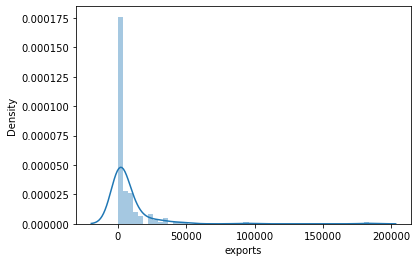

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


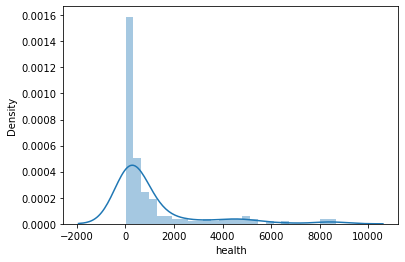

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


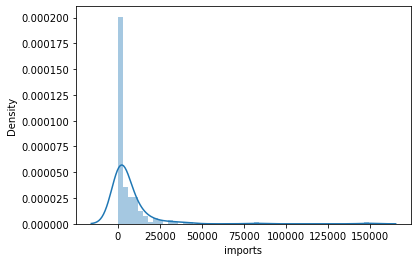

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


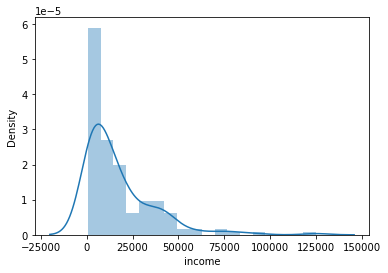

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


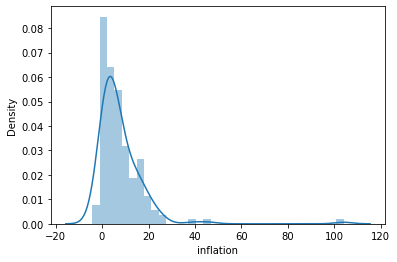

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


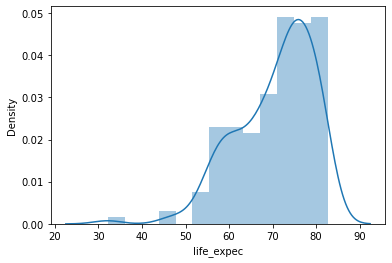

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


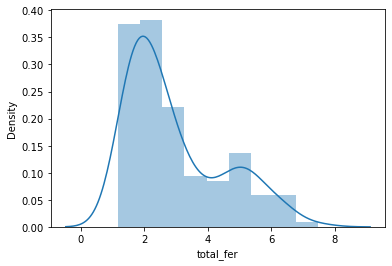

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


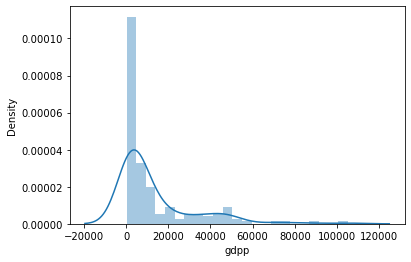

In [13]:
# distplot
for c in col:
    sns.distplot(df[c])
    plt.show();

<AxesSubplot:>

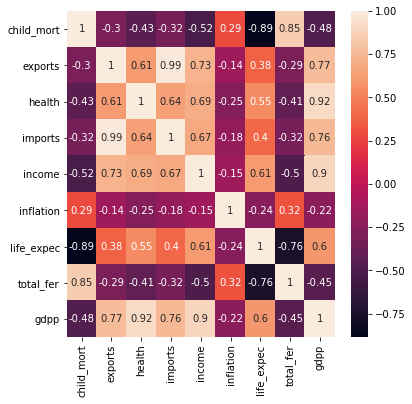

In [14]:
#Correlation matrix
plt.figure(figsize = (6,6))
sns.heatmap(df[col].corr(), annot = True)

## Outlier treatment

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


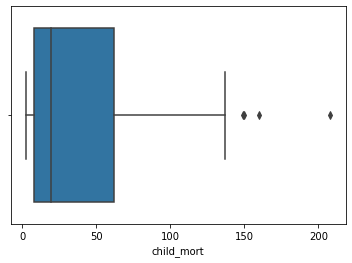

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


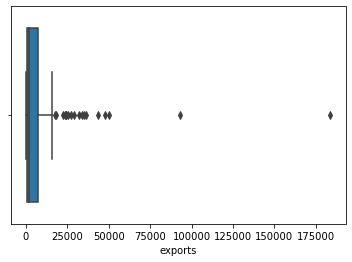

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


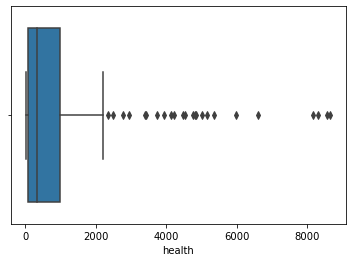

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


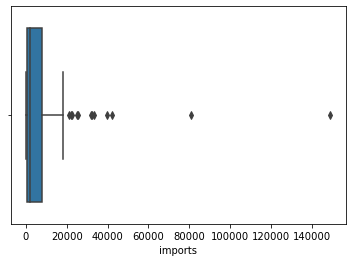

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


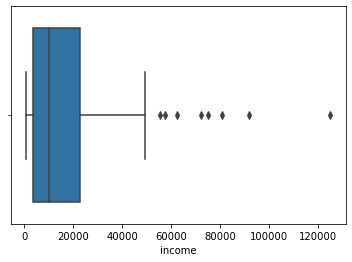

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


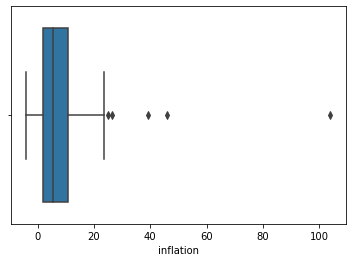

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


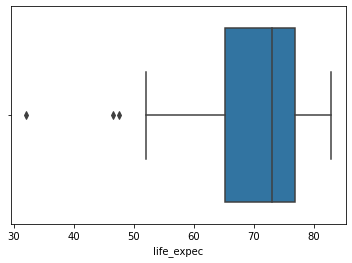

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


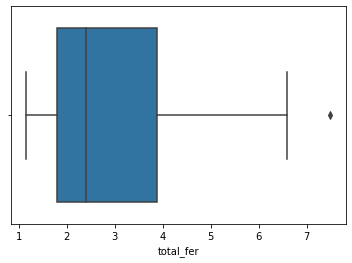

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


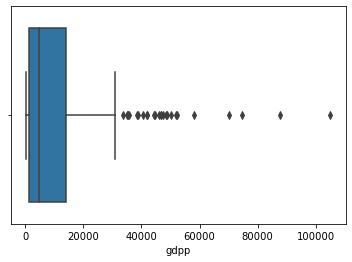

In [15]:
for c in col:
    sns.boxplot(df[c])
    plt.show();

In [16]:
# drop outliers
#child_mortality, inflation, total fert do capping for lower
#rest do upper capping

In [17]:
q1 = df['child_mort'].quantile(0.01)
print(q1)

2.8


In [18]:
df['child_mort'][df['child_mort']<=q1] = q1

<ipython-input-18-848ea37a9074>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['child_mort'][df['child_mort']<=q1] = q1


In [19]:
q2 = df['inflation'].quantile(0.01)
q3 = df['total_fer'].quantile(0.01)

In [20]:
df['inflation'][df['inflation']<=q2] = q2
df['total_fer'][df['total_fer']<=q3] = q3

<ipython-input-20-4353c3cbf4ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inflation'][df['inflation']<=q2] = q2
<ipython-input-20-4353c3cbf4ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_fer'][df['total_fer']<=q3] = q3


C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


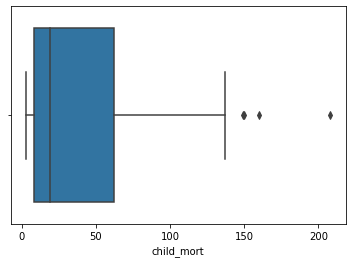

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


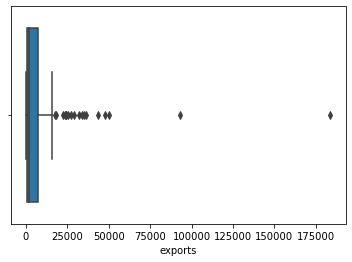

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


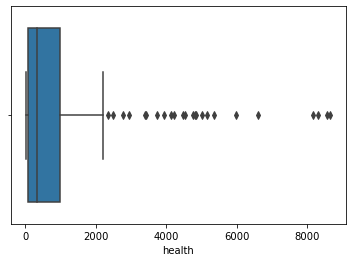

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


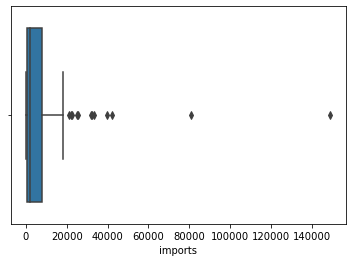

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


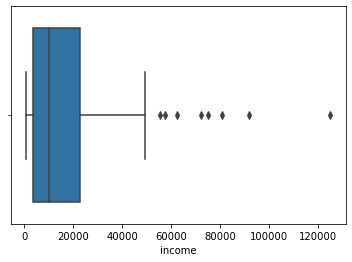

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


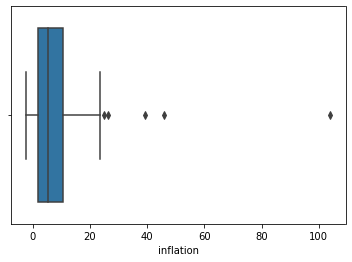

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


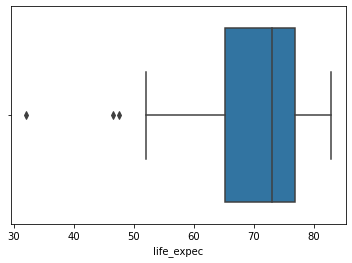

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


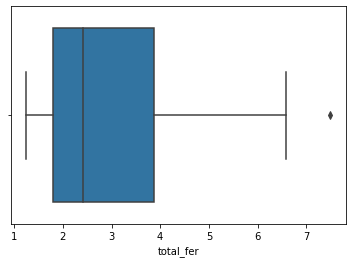

C:\Users\tanus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


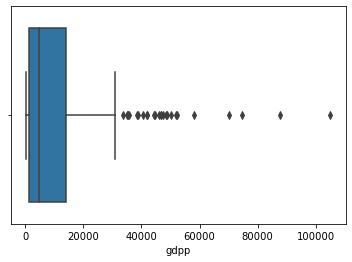

In [21]:
for c in col:
    sns.boxplot(df[c])
    plt.show();

## Scaling

In [22]:
ss = StandardScaler()
df1 = ss.fit_transform(df.drop('country', axis= 1))

In [23]:
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [24]:
df1 = pd.DataFrame(df1)
df1.columns = col
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.411011,-0.565040,-0.432276,-0.808245,0.156035,-1.619092,1.903390,-0.679180
1,-0.538993,-0.350191,-0.439218,-0.313677,-0.375369,-0.314406,0.647866,-0.860816,-0.485623
2,-0.272870,-0.318526,-0.484826,-0.353720,-0.220844,0.788991,0.670423,-0.038846,-0.465376
3,2.007831,-0.291375,-0.532363,-0.345953,-0.585043,1.387733,-1.179234,2.128769,-0.516268
4,-0.695682,-0.104331,-0.178771,0.040735,0.101732,-0.604273,0.704258,-0.542634,-0.041817


### Check Cluster Tendency- Hopkins Test


In [25]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [81]:
# Hopkins measure give the measure of randomness in out fata
hopkins(df.drop('country', axis = 1))

0.9268066895977818

## Finding the best value of k:
### Using SSD(Sum of Squared Distances), Silhouette score

In [27]:
#Silhouette score
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
    
ss

[[2, 0.4586928220139615],
 [3, 0.42202982258659544],
 [4, 0.4293345430108991],
 [5, 0.4309872313189065],
 [6, 0.393020896898787],
 [7, 0.3046744510060714],
 [8, 0.2959368619187643],
 [9, 0.2904898871435027],
 [10, 0.3029110508949038]]

In [28]:
sil = pd.DataFrame(ss)
sil

,0,1
0,2,0.458693
1,3,0.422030
2,4,0.429335
3,5,0.430987
4,6,0.393021
5,7,0.304674
6,8,0.295937
7,9,0.290490
8,10,0.302911


Text(0, 0.5, 'Silhoutte Score')

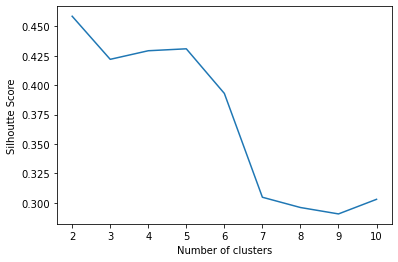

In [29]:
plt.plot(sil[0], sil[1])
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')

In Silhoutte score we see the highest peak at k = 5

In [30]:
# SSD : elbow curve method

In [31]:
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df1)
    ssd.append([k, kmean.inertia_])
ssd

[[2, 942.2902457163536],
 [3, 651.4215320449882],
 [4, 479.9744085348622],
 [5, 408.9122642521758],
 [6, 349.37248613220635],
 [7, 300.6794738512692],
 [8, 271.93725226299046],
 [9, 244.6501828936718],
 [10, 218.87683606550726]]

In [32]:
ssd = pd.DataFrame(ssd)
ssd

,0,1
0,2,942.290246
1,3,651.421532
2,4,479.974409
3,5,408.912264
4,6,349.372486
5,7,300.679474
6,8,271.937252
7,9,244.650183
8,10,218.876836


Text(0, 0.5, 'SSD')

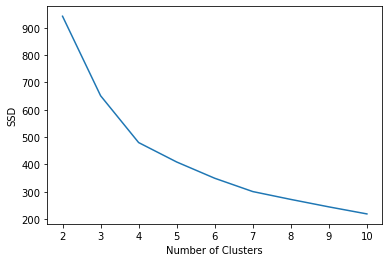

In [33]:
plt.plot(ssd[0], ssd[1])
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')

In the SSD analysis we see the elbow between k= 3 to k = 5

## Using value of K = 5, 4, 3, perform k means

In [34]:
# k=5
kmeans = KMeans(n_clusters = 5, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=5, random_state=0)

In [35]:
kmeans.cluster_centers_

array([[-0.82716864,  0.91964934,  1.64452729,  0.92999911,  1.53650234,
        -0.47781426,  1.11930356, -0.76484837,  1.70403909],
       [-0.43198835, -0.22514921, -0.3184781 , -0.21078481, -0.19030499,
        -0.12368207,  0.30715383, -0.47300665, -0.30912018],
       [ 0.48404761, -0.30854399, -0.41667584, -0.35184207, -0.3828263 ,
         5.24946367, -0.35967066,  0.4649426 , -0.37234597],
       [ 1.30630067, -0.36469852, -0.52448663, -0.39220499, -0.69062463,
         0.20467625, -1.27930022,  1.34262273, -0.60545333],
       [-0.88221717,  9.83981418,  3.95419692,  9.71668122,  3.87899553,
        -0.39708921,  1.21178644, -0.87407317,  5.03650669]])

In [36]:
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 3,
       1, 0, 1, 3, 3, 1, 3, 0, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 0, 1,
       0, 1, 1, 1, 1, 3, 3, 1, 1, 0, 0, 3, 3, 1, 0, 3, 0, 1, 1, 3, 3, 1,
       3, 1, 0, 1, 1, 1, 3, 0, 0, 0, 1, 0, 1, 1, 3, 3, 0, 1, 3, 1, 1, 3,
       3, 1, 1, 4, 1, 3, 3, 1, 1, 3, 0, 3, 1, 1, 1, 2, 1, 1, 3, 1, 3, 1,
       0, 0, 3, 2, 0, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 0, 1, 0, 3, 3, 1, 0, 1, 1, 3, 1, 0, 0, 1, 3, 1, 3, 3, 1, 1, 1,
       1, 3, 1, 0, 0, 0, 1, 1, 1, 2, 1, 3, 3])

In [37]:
#now we will assign labels

In [38]:
df['labels'] = kmeans.labels_

In [39]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [40]:
df['labels'].value_counts()

1    86
3    47
0    30
2     3
4     1
Name: labels, dtype: int64

In [41]:
# k=3

kmeans = KMeans(n_clusters = 3, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [42]:
kmeans.cluster_centers_

array([[ 1.32661556, -0.36504233, -0.52444743, -0.39281661, -0.68923797,
         0.39088869, -1.27627565,  1.35458158, -0.60496339],
       [-0.82616786,  1.31794823,  1.82094465,  1.3111162 ,  1.71870094,
        -0.45166098,  1.12317044, -0.78521896,  1.92353171],
       [-0.44554776, -0.21297273, -0.28365905, -0.1962204 , -0.16527697,
        -0.06721043,  0.32760944, -0.47289874, -0.27275434]])

In [43]:
df['labels'] = kmeans.labels_


In [44]:
df['labels'].value_counts()

2    91
0    48
1    28
Name: labels, dtype: int64

In [45]:
# k = 4
kmeans = KMeans(n_clusters = 4, random_state=0)
kmeans.fit(df1)


KMeans(n_clusters=4, random_state=0)

In [46]:
kmeans.cluster_centers_

array([[-0.42672887, -0.22837453, -0.33225537, -0.21708047, -0.20015868,
        -0.03851864,  0.29227273, -0.46169227, -0.31771574],
       [-0.88221717,  7.31330621,  2.19664845,  7.39795921,  3.36911695,
        -0.57129474,  1.29073525, -1.00227398,  3.43858583],
       [-0.82625669,  0.75880011,  1.65621321,  0.76484267,  1.45863313,
        -0.47563154,  1.10840111, -0.76160468,  1.66007803],
       [ 1.32661556, -0.36504233, -0.52444743, -0.39281661, -0.68923797,
         0.39088869, -1.27627565,  1.35458158, -0.60496339]])

In [47]:
df['labels'] = kmeans.labels_

In [48]:
df['labels'].value_counts()

0    87
3    48
2    30
1     2
Name: labels, dtype: int64

## Visualise cluster using scatter plots
Visualization using GDPP, Income, Child_mort

<AxesSubplot:xlabel='gdpp', ylabel='income'>

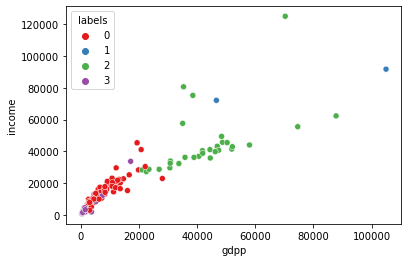

In [49]:
sns.scatterplot(x='gdpp', y = 'income', hue = 'labels', data = df, palette = 'Set1')

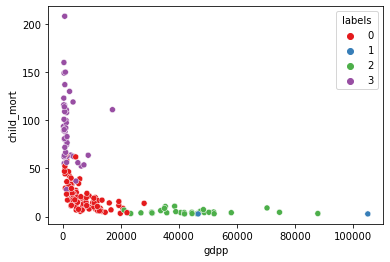

In [50]:
plt1 = sns.scatterplot(x='gdpp', y = 'child_mort', hue = 'labels', data = df, palette = 'Set1')

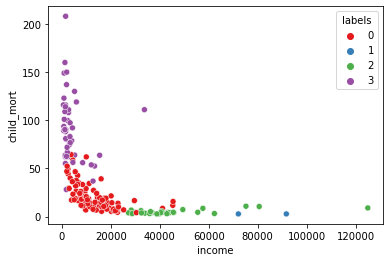

In [51]:
plt1 = sns.scatterplot(x='income', y = 'child_mort', hue = 'labels', data = df, palette = 'Set1')

## Cluster Profiling
__Making sense out of cluster.__
Using gdpp, Income, Child_mort for cluster profiling

In [52]:
ss = StandardScaler()


In [53]:
df_scaled = pd.DataFrame(ss.fit_transform(df.drop(['country','labels'], axis= 1)),columns = df.columns[1:-1])

In [54]:
df_scaled['labels'] = df['labels']

<AxesSubplot:xlabel='labels'>

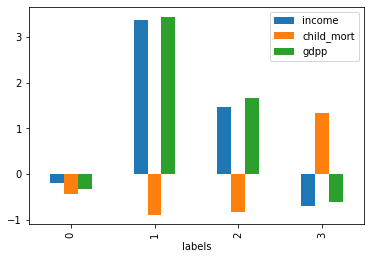

In [55]:
df_scaled[['income', 'child_mort', 'gdpp', 'labels']].groupby('labels').mean().plot(kind = 'bar')

In [56]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [57]:
#Calculating cluster mean

df[['income', 'child_mort', 'gdpp', 'labels']].groupby('labels').mean()

,income,child_mort,gdpp
labels,,,
0,13297.586207,21.113793,7158.298851
1,81900.000000,2.800000,75800.000000
2,45180.000000,5.050000,43300.000000
3,3897.354167,91.610417,1909.208333


In [58]:
## choose cluster with low gdpp, low income, high child mort
c1 = df[df['labels'] == 3]
c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,3
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,3
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,3
21,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350,3
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,3


In [59]:
c1.sort_values(by = ['income', 'gdpp', 'child_mort'], ascending = [True, True, False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,3
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,3
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,3
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,3
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,3


### List of countries in dire need of help:
- Congo, Dem. Rep.
- Liberia
- Burundi	
- Niger
- Central African Republic

## Hierarchical Clustering

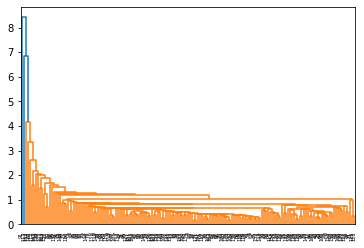

In [60]:
#single linkage
mergings = linkage(df1, method = "single" , metric = 'euclidean')
dendrogram(mergings)
plt.show()

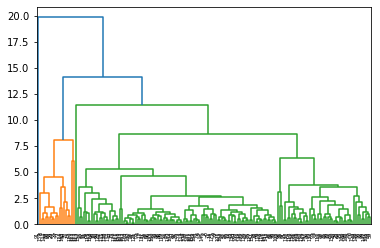

In [61]:
#complete linkage
mergings = linkage(df1, method = "complete" , metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [62]:
# Using complete Linkage histogram to perform clustering as it is clearer than single linkage
# Taking number of clusters as 3
cluster_labels = cut_tree(mergings, n_clusters = 3).reshape(-1)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [63]:
df1['cluster_labeles'] = cluster_labels
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labeles
0,1.291537,-0.411011,-0.565040,-0.432276,-0.808245,0.156035,-1.619092,1.903390,-0.679180,0
1,-0.538993,-0.350191,-0.439218,-0.313677,-0.375369,-0.314406,0.647866,-0.860816,-0.485623,0
2,-0.272870,-0.318526,-0.484826,-0.353720,-0.220844,0.788991,0.670423,-0.038846,-0.465376,0
3,2.007831,-0.291375,-0.532363,-0.345953,-0.585043,1.387733,-1.179234,2.128769,-0.516268,0
4,-0.695682,-0.104331,-0.178771,0.040735,0.101732,-0.604273,0.704258,-0.542634,-0.041817,0


<AxesSubplot:xlabel='cluster_labeles'>

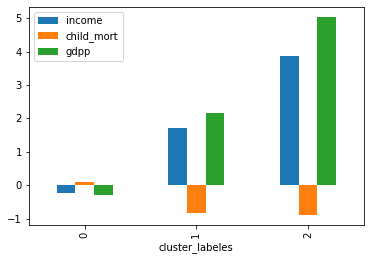

In [64]:
#Comparing income, child_mort, gdpp in the 3 clusters
df1[['income', 'child_mort', 'gdpp', 'cluster_labeles']].groupby('cluster_labeles').mean().plot(kind = 'bar')

In [65]:
df1['cluster_labeles'].value_counts()

0    148
1     18
2      1
Name: cluster_labeles, dtype: int64

In [66]:

df1['country'] = df['country']

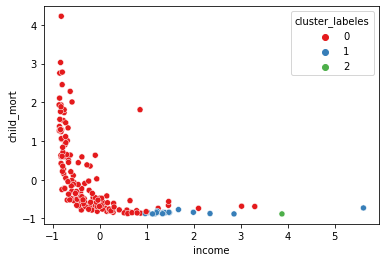

In [67]:
# Visualising complete linkage hostogram using scatter plot
plt1 = sns.scatterplot(x='income', y = 'child_mort', hue = 'cluster_labeles', data = df1, palette = 'Set1')

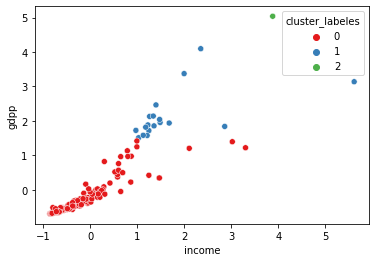

In [68]:
plt1 = sns.scatterplot(x='income', y = 'gdpp', hue = 'cluster_labeles', data = df1, palette = 'Set1')

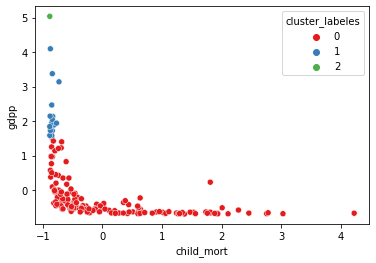

In [69]:
plt1 = sns.scatterplot(x='child_mort', y = 'gdpp', hue = 'cluster_labeles', data = df1, palette = 'Set1')

In [70]:
# Choosing cluster with low income, low gdpp and high child_mort
df1[df1['cluster_labeles'] == 0]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labeles,country
0,1.291537,-0.411011,-0.565040,-0.432276,-0.808245,0.156035,-1.619092,1.903390,-0.679180,0,Afghanistan
1,-0.538993,-0.350191,-0.439218,-0.313677,-0.375369,-0.314406,0.647866,-0.860816,-0.485623,0,Albania
2,-0.272870,-0.318526,-0.484826,-0.353720,-0.220844,0.788991,0.670423,-0.038846,-0.465376,0,Algeria
3,2.007831,-0.291375,-0.532363,-0.345953,-0.585043,1.387733,-1.179234,2.128769,-0.516268,0,Angola
4,-0.695682,-0.104331,-0.178771,0.040735,0.101732,-0.604273,0.704258,-0.542634,-0.041817,0,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...,...
162,-0.225614,-0.336864,-0.501562,-0.342488,-0.738527,-0.492128,-0.852161,0.365511,-0.546913,0,Vanuatu
163,-0.526557,-0.199393,-0.219310,-0.287205,-0.033542,3.621138,0.546361,-0.317255,0.029323,0,Venezuela
164,-0.372355,-0.361463,-0.538488,-0.377572,-0.658404,0.408837,0.286958,-0.661952,-0.637754,0,Vietnam
165,0.448399,-0.392166,-0.550596,-0.418479,-0.658924,1.501780,-0.344633,1.141079,-0.637754,0,Yemen


In [71]:

c2 = df1[df1['cluster_labeles'] == 0]
c2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labeles,country
0,1.291537,-0.411011,-0.565040,-0.432276,-0.808245,0.156035,-1.619092,1.903390,-0.679180,0,Afghanistan
1,-0.538993,-0.350191,-0.439218,-0.313677,-0.375369,-0.314406,0.647866,-0.860816,-0.485623,0,Albania
2,-0.272870,-0.318526,-0.484826,-0.353720,-0.220844,0.788991,0.670423,-0.038846,-0.465376,0,Algeria
3,2.007831,-0.291375,-0.532363,-0.345953,-0.585043,1.387733,-1.179234,2.128769,-0.516268,0,Angola
4,-0.695682,-0.104331,-0.178771,0.040735,0.101732,-0.604273,0.704258,-0.542634,-0.041817,0,Antigua and Barbuda


In [72]:
c2.sort_values(by = ['income', 'gdpp', 'child_mort'], ascending = [True, True, False]).head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labeles,country
37,1.933217,-0.406437,-0.573669,-0.437910,-0.860326,1.235672,-1.472473,2.380663,-0.691164,0,"Congo, Dem. Rep."
88,1.269152,-0.410612,-0.566895,-0.428559,-0.855591,-0.221268,-1.100286,1.373087,-0.691547,0,Liberia
26,1.376099,-0.412947,-0.573459,-0.443031,-0.852261,0.427845,-1.449916,2.195057,-0.696801,0,Burundi
112,2.107316,-0.409786,-0.578381,-0.437555,-0.849660,-0.498780,-1.325854,3.010398,-0.690398,0,Niger
31,2.753971,-0.411160,-0.578496,-0.441146,-0.845810,-0.550101,-2.600313,1.499034,-0.685035,0,Central African Republic


## List of Countries in dire need of aid:
- Congo, Dem. Rep.
- Liberia
- Burundi
- Niger
- Central African Republic